In [30]:
from imageai.Prediction.Custom import CustomImagePrediction
import os

execution_path = os.getcwd()

prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "female_model_6.h5"))
prediction.setJsonPath(os.path.join(execution_path, "female_model_class.json"))
prediction.loadModel(num_objects=6)

In [34]:

cities = ['memphis', 'akron', 'detroit', 'chicago', 'san francisco', 'denver']

import glob
from scipy import stats
import numpy as np

results_city = {}
for city in cities:
    city_results = []
    for f in glob.glob('cleaned_images_city/'+city+'/*.jpeg'):
        predictions, probabilities = prediction.predictImage(f, result_count=1)
        if float(probabilities[0])>60:
            city_results.append(int(predictions[0]))
    tst = np.array(city_results)
    results_city[city]={'mean':tst.mean(),'std':stats.sem(tst)}

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [35]:
results_city

{'memphis': {'mean': 4.0, 'std': nan},
 'akron': {'mean': 2.625, 'std': 0.6797452253812243},
 'detroit': {'mean': 4.0, 'std': 0.0},
 'chicago': {'mean': 3.090909090909091, 'std': 0.4758637210291782},
 'san francisco': {'mean': 1.7142857142857142, 'std': 0.8081220356417684},
 'denver': {'mean': 2.0, 'std': 0.7559289460184544}}

In [36]:
import matplotlib.pyplot as plt

Text(0,0.5,'average weight bucket')

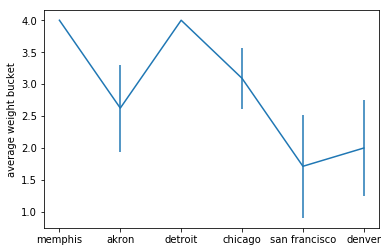

In [49]:
cs = []
mns = []
ses = []
for c in results_city:
    mn = results_city[c]['mean']
    se = results_city[c]['std']
    cs.append(c)
    mns.append(mn)
    ses.append(se)
plt.errorbar(cs,mns,ses)
plt.ylabel('average weight bucket')

In [100]:
res = []
for f in glob.glob('cleaned_images_picaday/*.jpeg'):
    index = int(f.split('/')[1].split('.')[0])
    predictions, probabilities = prediction.predictImage(f, result_count=1)
    if(float(probabilities[0])>55):
        res.append((index, int(predictions[0])))
arr_res = np.array(res)

Text(0.5,0,'selfie #')

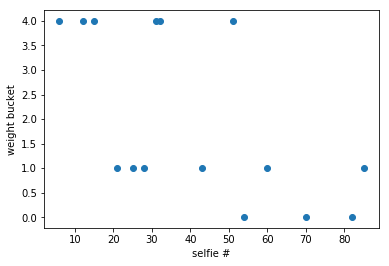

In [102]:
arr_ordered = np.sort(arr_res.view('i8,i8'),axis=0,order=['f0']).view(np.int)
plt.scatter(arr_ordered[:,0],arr_ordered[:,1])
plt.ylabel('weight bucket')
plt.xlabel('selfie #')
# print(arr_ordered[:10,1].mean())
# print(arr_ordered[10:20,1].mean())
# print(arr_ordered[20:30,1].mean())
# print(arr_ordered[30:40,1].mean())
# print(arr_ordered[40:50,1].mean())
# print(arr_ordered[50:60,1].mean())
# print(arr_ordered[60:70,1].mean())
# print(arr_ordered[70:80,1].mean())

In [9]:
execution_path = os.getcwd()

prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()
prediction.setModelPath(os.path.join(execution_path, "male_model.h5"))
prediction.setJsonPath(os.path.join(execution_path, "male_model_class.json"))
prediction.loadModel(num_objects=4)

In [16]:
import pandas as pd
min_val = 100
max_val = 450
root_directory = 'holdout_set/male/'
files = glob.glob(root_directory+'/*/*')
vals = [int(f.split('/')[-1].split('__')[0]) for f in files]

bin_maxes = np.array([185,235,360,445]) # male 4
# bin_maxes = np.array([150,185,235,400]) # female 4

# bin_maxes = np.array([142,165,195,235,353,400])
results = []
for v, f in sorted(zip(vals,files)):
    if v < max_val and v > min_val:
        try:
            predictions, probabilities = prediction.predictImage(f, result_count=1)
            bn = np.where(v < bin_maxes)[0][0]
            results.append({'truth':bn, 'prediction':int(predictions[0]), 'prob':float(probabilities[0])})
        except:
            print('uhoh {}'.format(f))
df_ev = pd.DataFrame.from_records(results)

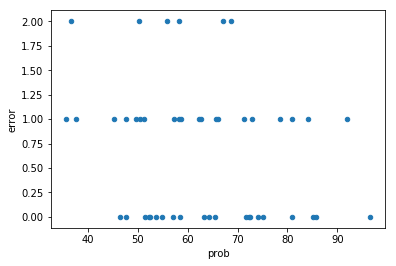

In [17]:
df_ev['error']=(df_ev['truth']-df_ev['prediction']).abs()
df_ev.plot.scatter('prob','error')

In [25]:
np.sqrt((df_ev.loc[df_ev['prob']>70,'truth']-df_ev.loc[df_ev['prob']>70,'prediction']).pow(2).mean())

0.6324555320336759

In [24]:
np.sqrt((df_ev.loc[df_ev['prob']>70,'truth']-df_ev.loc[df_ev['prob']>70,'truth'].mean()).pow(2).mean())

0.6531972647421809